In [1]:
import pandas as pd

# Loading the CSV file
file_path = "CWC23_all_innings.csv"
data = pd.read_csv(file_path)

In [2]:
# Display the first few rows of the dataset
data.head()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


In [3]:
# Get an overview of the columns and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

In [4]:
# Descriptive statistics of numerical columns
data.describe()

,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
count,1408.000000,1408.000000,562.000000,1408.000000,1408.000000,562.000000,562.000000,562.000000,1408.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,35.305398,33.237216,1.204626,0.070574,0.898755,7.342527,0.256228,5.946637,1.470881,2.605201,0.751773,83.716596,0.151300,42.721040
std,25.248709,28.056329,1.198237,0.152535,0.471051,2.679736,0.532547,2.141566,0.499329,3.146922,1.504184,52.475444,0.358553,41.576908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,1.350000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.750000,11.000000,0.000000,0.010724,0.621350,5.550000,0.000000,4.500000,1.000000,0.000000,0.000000,51.610000,0.000000,12.000000
50%,32.000000,29.000000,1.000000,0.032258,0.879005,8.000000,0.000000,5.675000,1.000000,2.000000,0.000000,81.810000,0.000000,28.000000
75%,54.000000,49.000000,2.000000,0.062500,1.130819,10.000000,0.000000,7.120000,2.000000,4.000000,1.000000,107.020000,0.000000,60.000000
max,143.000000,201.000000,7.000000,1.000000,6.000000,10.000000,3.000000,16.000000,2.000000,21.000000,11.000000,600.000000,1.000000,217.000000


# 1. Team Performance Analysis:

In [5]:
# team-wise performance metrics
team_performance = data.groupby('team').agg({
    'runs': 'sum', 'wkts': 'sum', 'bb_bf': 'sum', '4s': 'sum', '6s': 'sum',
    'mdns': 'sum', 'inns': 'sum', 'not_out': 'sum', 'mins': 'sum'
}).reset_index()

print(team_performance)

  team  runs  wkts  bb_bf     4s    6s  mdns  inns  not_out    mins
0  AFG  4134  53.0   4795  178.0  42.0  13.0   185     12.0  3462.0
1  AUS  5234  77.0   5482  265.0  92.0  13.0   224     15.0  4090.0
2  BAN  4358  51.0   4849  188.0  43.0  13.0   210     13.0  3599.0
3  ENG  4396  65.0   4620  216.0  51.0  14.0   221     12.0  3301.0
4  IND  4783  94.0   5191  265.0  89.0  23.0   180     18.0  3881.0
5  NED  4268  63.0   4802  163.0  33.0  11.0   237     10.0  3167.0
6   NZ  5376  71.0   5320  265.0  82.0  17.0   214     15.0  3895.0
7  PAK  4786  65.0   4787  220.0  60.0   8.0   187     10.0  3342.0
8   SA  5097  88.0   5348  243.0  99.0  20.0   212     15.0  4083.0
9   SL  4366  50.0   4516  201.0  45.0  12.0   201      8.0  3322.0


In [6]:
# runs scored, wickets taken, and batting/bowling styles
batting_bowling_styles = data.groupby(['team', 'bat_or_bowl']).size().unstack().fillna(0)
print(batting_bowling_styles)

bat_or_bowl  bat  bowl
team                  
AFG           74    55
AUS           93    62
BAN           89    52
ENG           98    53
IND           66    58
NED           98    59
NZ            81    63
PAK           76    52
SA            87    54
SL            84    54


In [7]:
# top-performing teams and their strengths
top_teams_runs = team_performance.nlargest(5, 'runs')
top_teams_wickets = team_performance.nlargest(5, 'wkts')

print("Top Teams by Runs:\n")
print(top_teams_runs.to_string(index=False))

print("\nTop Teams by Wickets:\n")
print(top_teams_wickets.to_string(index=False))

Top Teams by Runs:

team  runs  wkts  bb_bf    4s   6s  mdns  inns  not_out   mins
  NZ  5376  71.0   5320 265.0 82.0  17.0   214     15.0 3895.0
 AUS  5234  77.0   5482 265.0 92.0  13.0   224     15.0 4090.0
  SA  5097  88.0   5348 243.0 99.0  20.0   212     15.0 4083.0
 PAK  4786  65.0   4787 220.0 60.0   8.0   187     10.0 3342.0
 IND  4783  94.0   5191 265.0 89.0  23.0   180     18.0 3881.0

Top Teams by Wickets:

team  runs  wkts  bb_bf    4s   6s  mdns  inns  not_out   mins
 IND  4783  94.0   5191 265.0 89.0  23.0   180     18.0 3881.0
  SA  5097  88.0   5348 243.0 99.0  20.0   212     15.0 4083.0
 AUS  5234  77.0   5482 265.0 92.0  13.0   224     15.0 4090.0
  NZ  5376  71.0   5320 265.0 82.0  17.0   214     15.0 3895.0
 ENG  4396  65.0   4620 216.0 51.0  14.0   221     12.0 3301.0


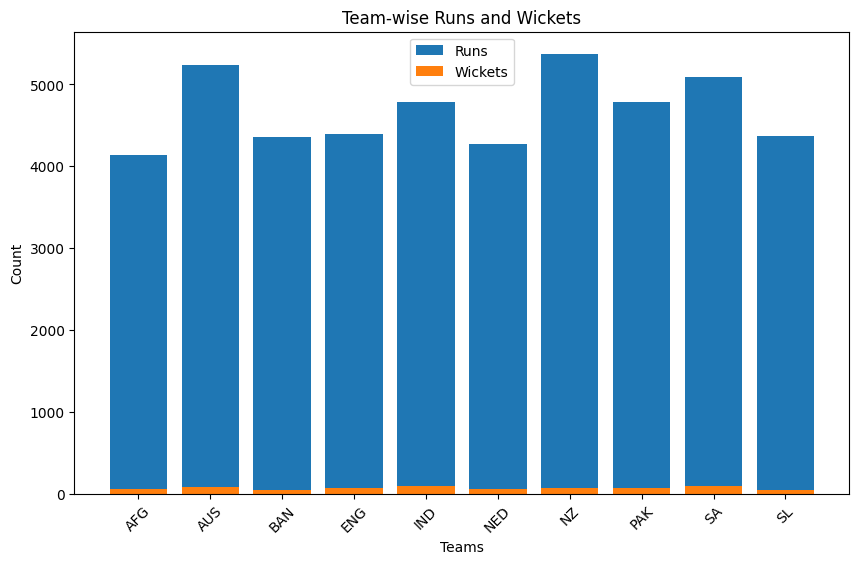

In [8]:
import matplotlib.pyplot as plt

# Team Performance Analysis - Bar chart for team-wise performance metrics
plt.figure(figsize=(10, 6))
plt.bar(team_performance['team'], team_performance['runs'], label='Runs')
plt.bar(team_performance['team'], team_performance['wkts'], label='Wickets')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title('Team-wise Runs and Wickets')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 2. Player Performance Analysis

In [9]:
# individual player statistics for both batting and bowling
player_stats = data.groupby(['player', 'bat_or_bowl']).agg({
    'runs': 'sum', 'wkts': 'sum', 'bb_bf': 'sum', '4s': 'sum', '6s': 'sum',
    'mdns': 'sum', 'inns': 'sum', 'not_out': 'sum', 'mins': 'sum'
}).reset_index()

print(player_stats)

                    player bat_or_bowl  runs  wkts  bb_bf    4s   6s  mdns  \
0             A Dutt (NED)         bat    70   0.0     87   1.0  5.0   0.0   
1             A Dutt (NED)        bowl   426  10.0    465   0.0  0.0   6.0   
2            A Zampa (AUS)         bat    48   0.0     60   5.0  0.0   0.0   
3            A Zampa (AUS)        bowl   471  22.0    516   0.0  0.0   1.0   
4       AAP Atkinson (ENG)         bat    37   0.0     24   7.0  0.0   0.0   
..                     ...         ...   ...   ...    ...   ...  ...   ...   
243          V Kohli (IND)        bowl    15   1.0     21   0.0  0.0   0.0   
244  Vikramjit Singh (NED)         bat    98   0.0    150  12.0  1.0   0.0   
245  Vikramjit Singh (NED)        bowl    52   0.0     42   0.0  0.0   0.0   
246        W Barresi (NED)         bat    83   0.0    112  11.0  1.0   0.0   
247          WA Young (NZ)         bat   206   0.0    246  23.0  6.0   0.0   

     inns  not_out   mins  
0      14      3.0  124.0  
1      

In [10]:
# leading run-scorers and wicket-takers
leading_run_scorers = player_stats[player_stats['bat_or_bowl'] == 'bat'].nlargest(5, 'runs')
leading_wicket_takers = player_stats[player_stats['bat_or_bowl'] == 'bowl'].nlargest(5, 'wkts')

print("Leading Run Scorers:")
print(leading_run_scorers.to_string(index=False))

Leading Run Scorers:
          player bat_or_bowl  runs  wkts  bb_bf   4s   6s  mdns  inns  not_out   mins
   V Kohli (IND)         bat   711   0.0    784 64.0  9.0   0.0    15      3.0 1097.0
  Q de Kock (SA)         bat   594   0.0    555 57.0 21.0   0.0    14      0.0  799.0
 R Ravindra (NZ)         bat   578   0.0    543 55.0 17.0   0.0    16      1.0  872.0
DJ Mitchell (NZ)         bat   552   0.0    497 48.0 22.0   0.0    14      1.0  724.0
 RG Sharma (IND)         bat   550   0.0    443 62.0 28.0   0.0    15      0.0  617.0


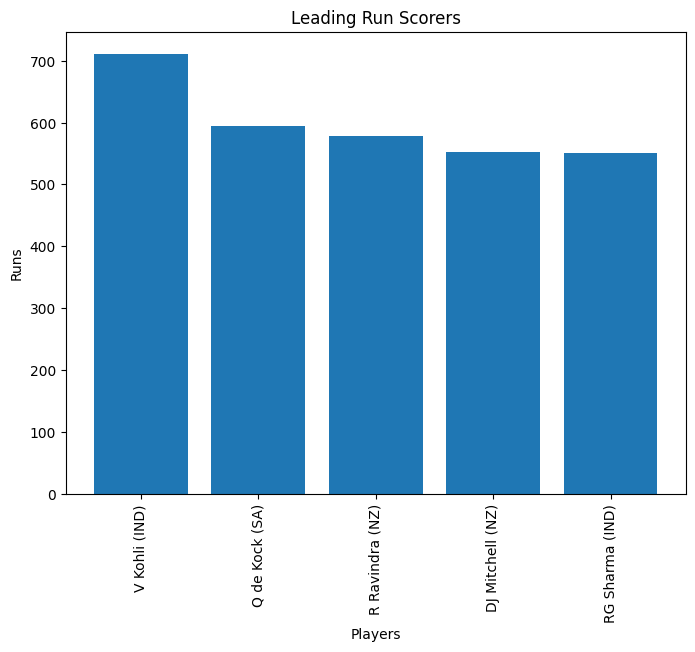

In [11]:
# Player Performance Analysis - Bar chart for leading run-scorers
plt.figure(figsize=(8, 6))
plt.bar(leading_run_scorers['player'], leading_run_scorers['runs'])
plt.xlabel('Players')
plt.ylabel('Runs')
plt.title('Leading Run Scorers')
plt.xticks(rotation=90)
plt.show()

In [12]:
print("\nLeading Wicket Takers:")
print(leading_wicket_takers.to_string(index=False))


Leading Wicket Takers:
              player bat_or_bowl  runs  wkts  bb_bf  4s  6s  mdns  inns  not_out  mins
Mohammed Shami (IND)        bowl   210  23.0    251 0.0 0.0   3.0    11      0.0   0.0
       A Zampa (AUS)        bowl   471  22.0    516 0.0 0.0   1.0    15      0.0   0.0
   D Madushanka (SL)        bowl   525  21.0    470 0.0 0.0   4.0    14      0.0   0.0
      G Coetzee (SA)        bowl   396  20.0    381 0.0 0.0   1.0    13      0.0   0.0
     JJ Bumrah (IND)        bowl   330  18.0    497 0.0 0.0   7.0    15      0.0   0.0


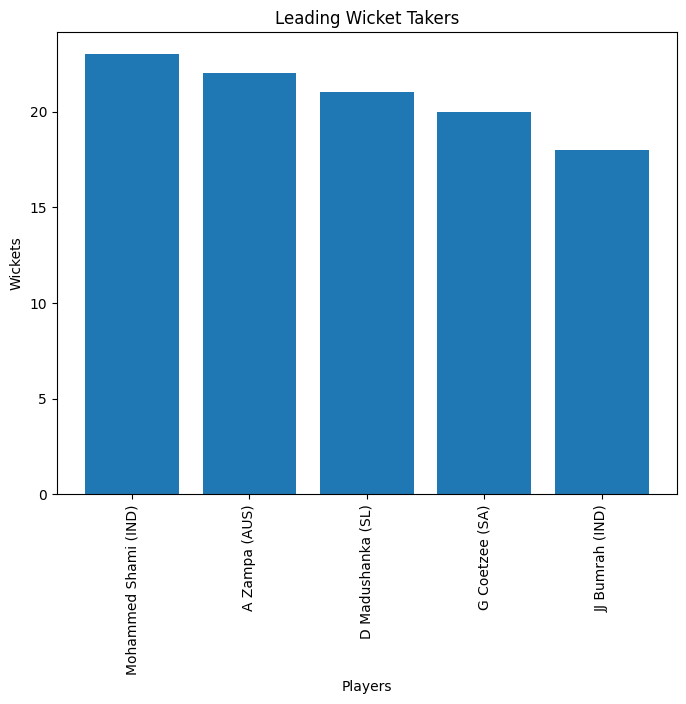

In [13]:
# Player Performance Analysis - Bar chart for leading wicket-takers
plt.figure(figsize=(8, 6))
plt.bar(leading_wicket_takers['player'], leading_wicket_takers['wkts'])
plt.xlabel('Players')
plt.ylabel('Wickets')
plt.title('Leading Wicket Takers')
plt.xticks(rotation=90)
plt.show()

# 3. Opposition and Ground Analysis

In [14]:
# teams and players perform against different oppositions
team_opposition_performance = data.groupby(['team', 'opposition']).agg({'runs': 'sum', 'wkts': 'sum'}).reset_index()
print(team_opposition_performance)

   team      opposition  runs  wkts
0   AFG     v Australia   563   6.0
1   AFG    v Bangladesh   303   3.0
2   AFG       v England   480  10.0
3   AFG         v India   525   2.0
4   AFG   v Netherlands   346   6.0
..  ...             ...   ...   ...
86   SL         v India   391   6.0
87   SL   v Netherlands   495   9.0
88   SL   v New Zealand   339   4.0
89   SL      v Pakistan   675   4.0
90   SL  v South Africa   733   5.0

[91 rows x 4 columns]


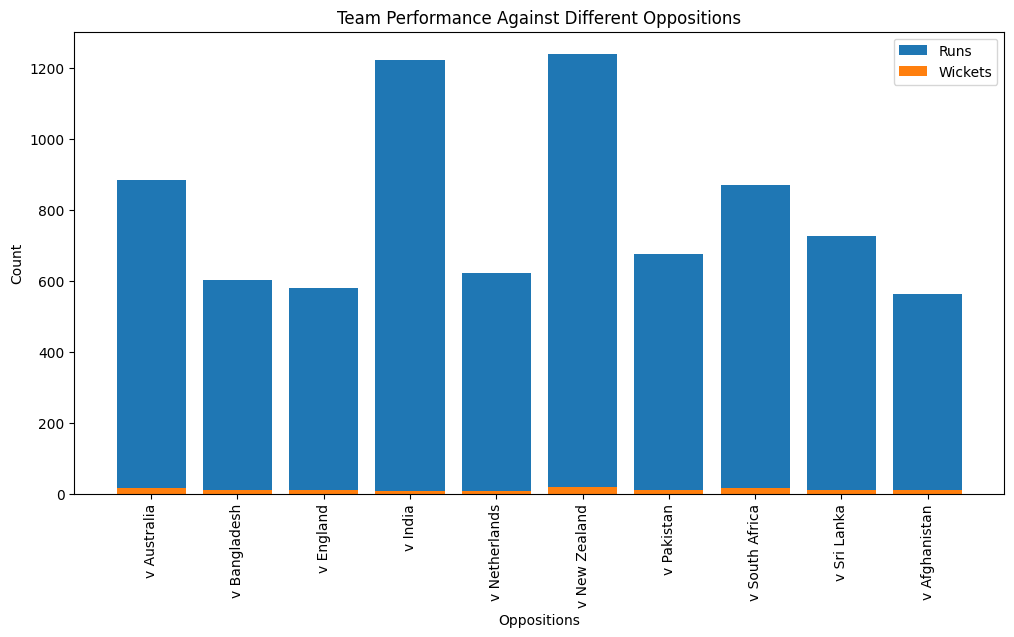

In [15]:
# Opposition and Ground Analysis - Bar chart for team performance against different oppositions
plt.figure(figsize=(12, 6))
plt.bar(team_opposition_performance['opposition'], team_opposition_performance['runs'], label='Runs')
plt.bar(team_opposition_performance['opposition'], team_opposition_performance['wkts'], label='Wickets')
plt.xlabel('Oppositions')
plt.ylabel('Count')
plt.title('Team Performance Against Different Oppositions')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [16]:
# performance variations across different playing grounds
team_ground_performance = data.groupby(['team', 'ground']).agg({'runs': 'sum', 'wkts': 'sum'}).reset_index()
print(team_ground_performance)

   team      ground  runs  wkts
0   AFG   Ahmedabad   473   5.0
1   AFG     Chennai   973  13.0
2   AFG       Delhi  1005  12.0
3   AFG  Dharamsala   303   3.0
4   AFG     Lucknow   346   6.0
..  ...         ...   ...   ...
67   SL       Delhi  1274  12.0
68   SL   Hyderabad   675   4.0
69   SL     Lucknow   906  13.0
70   SL        Pune   471   3.0
71   SL    Wankhede   391   6.0

[72 rows x 4 columns]


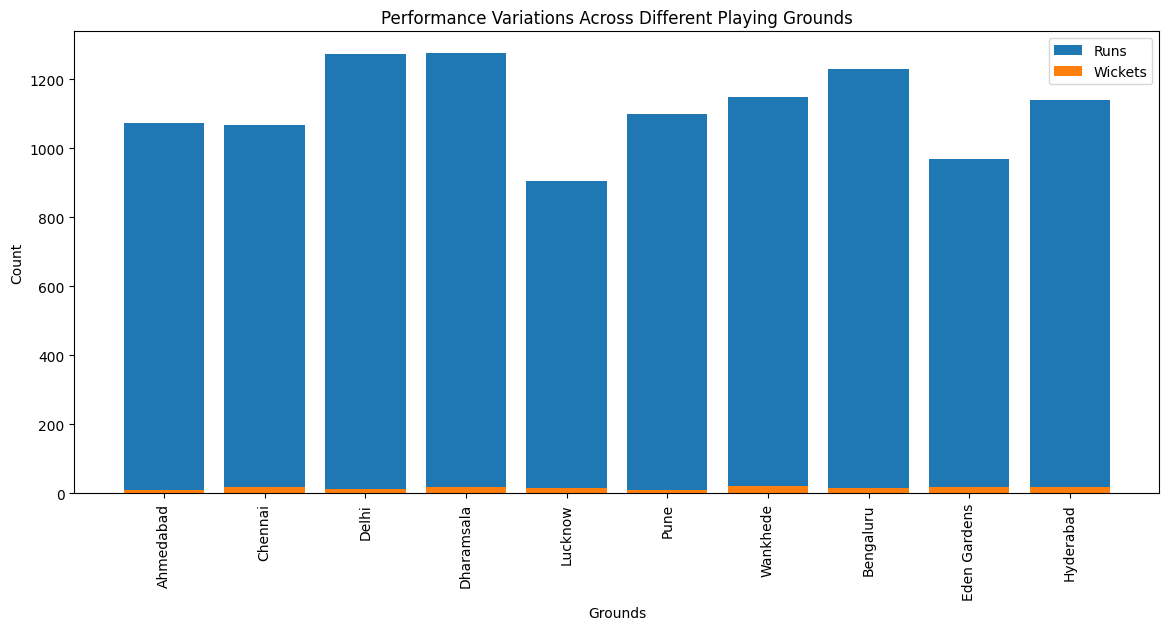

In [17]:
# Opposition and Ground Analysis - Bar chart for performance variations across different playing grounds
plt.figure(figsize=(14, 6))
plt.bar(team_ground_performance['ground'], team_ground_performance['runs'], label='Runs')
plt.bar(team_ground_performance['ground'], team_ground_performance['wkts'], label='Wickets')
plt.xlabel('Grounds')
plt.ylabel('Count')
plt.title('Performance Variations Across Different Playing Grounds')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [18]:
# Identifing if there are specific teams or players that excel in certain conditions
player_ground_performance = data.groupby(['player', 'ground', 'bat_or_bowl']).agg({
    'runs': 'sum', 'wkts': 'sum', 'bb_bf': 'sum', '4s': 'sum', '6s': 'sum',
    'mdns': 'sum', 'inns': 'sum', 'not_out': 'sum', 'mins': 'sum'
}).reset_index()

print(player_ground_performance)

             player      ground bat_or_bowl  runs  wkts  bb_bf   4s   6s  \
0      A Dutt (NED)   Bengaluru         bat     5   0.0     11  0.0  0.0   
1      A Dutt (NED)   Bengaluru        bowl    52   0.0     42  0.0  0.0   
2      A Dutt (NED)       Delhi         bat     1   0.0      8  0.0  0.0   
3      A Dutt (NED)       Delhi        bowl    59   1.0     42  0.0  0.0   
4      A Dutt (NED)  Dharamsala         bat    23   0.0      9  0.0  3.0   
...             ...         ...         ...   ...   ...    ...  ...  ...   
1149  WA Young (NZ)   Ahmedabad         bat     0   0.0      1  0.0  0.0   
1150  WA Young (NZ)     Chennai         bat    54   0.0     64  4.0  3.0   
1151  WA Young (NZ)  Dharamsala         bat    49   0.0     64  7.0  1.0   
1152  WA Young (NZ)   Hyderabad         bat    70   0.0     80  7.0  2.0   
1153  WA Young (NZ)        Pune         bat    33   0.0     37  5.0  0.0   

      mdns  inns  not_out   mins  
0      0.0     2      0.0    9.0  
1      0.0     1 

# 4. Temporal Analysis:

In [19]:
# Study performance trends over time
performance_over_time = data.groupby('start_date').agg({
    'runs': 'sum', 'wkts': 'sum', 'bb_bf': 'sum', '4s': 'sum', '6s': 'sum',
    'mdns': 'sum', 'inns': 'sum', 'not_out': 'sum', 'mins': 'sum'
}).reset_index()

print(performance_over_time)

   start_date  runs  wkts  bb_bf     4s    6s  mdns  inns  not_out    mins
0    1-Nov-23  1015  14.0   1018   43.0  19.0   5.0    43      2.0   731.0
1   10-Nov-23   950  14.0   1170   35.0  15.0   4.0    45      3.0   829.0
2   10-Oct-23  2495  32.0   2362  120.0  25.0   1.0    93      6.0  1687.0
3   11-Nov-23  2317  25.0   2263  118.0  30.0   3.0    87      7.0  1598.0
4   11-Oct-23  1050  10.0   1022   53.0  15.0   0.0    36      4.0   733.0
5   12-Nov-23  1282  14.0   1175   56.0  25.0   3.0    52      3.0   801.0
6   12-Oct-23   936  17.0   1089   45.0   8.0   5.0    46      1.0   782.0
7   13-Oct-23   964  11.0   1118   40.0  14.0   2.0    38      5.0   800.0
8   14-Oct-23   756  13.0    880   44.0   8.0   1.0    37      3.0   619.0
9   15-Nov-23  1400  14.0   1187   58.0  30.0   2.0    44      3.0   916.0
10  15-Oct-23   965  18.0   1088   47.0   9.0   5.0    52      2.0   771.0
11  16-Nov-23   819  17.0   1166   37.0  14.0   5.0    47      3.0   801.0
12  16-Oct-23   828  13.0

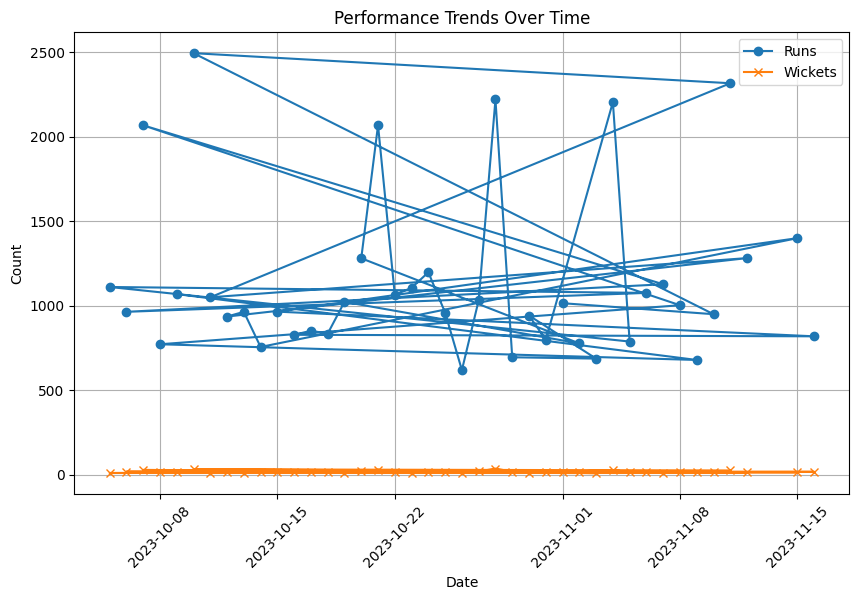

In [20]:
# Temporal Analysis - Line chart to study performance trends over time

performance_over_time['start_date'] = pd.to_datetime(performance_over_time['start_date'])

plt.figure(figsize=(10, 6))
plt.plot(performance_over_time['start_date'], performance_over_time['runs'], marker='o', label='Runs')
plt.plot(performance_over_time['start_date'], performance_over_time['wkts'], marker='x', label='Wickets')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Performance Trends Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Conclusion

This project provide a broader analysis covering various aspects of team and player performance, opposition and ground analysis, and temporal trends